<h1>Exploratory Research</h1>

In this notebook, the first relationships between variables are examined. This will primarily include 1-to-1 relationships between variables and survey performance.

In addition, some first comparison between visual and infrared will be performed, and the influence of number of asteroids is checked for robustness.

The used results files are as follows:

<ul>
    <li><b>df_vis_a</b>: 1000 asteroids, JPL model, semi-major axis (0.2, 2, 0.05), satellites (1, 6, 1), visual</li>
    <li><b>df_tir_a</b>: 1000 asteroids, JPL model, semi-major axis (0.2, 2, 0.05), satellites (1, 6, 1), thermal infrared</li>
    <li><b>df_vis_n</b>: 1000 asteroids, JPL model, semi-major axis (0.2, 2, 0.1), satellites (1, 11, 1), visual</li>
    <li><b>df_tir_n</b>: 1000 asteroids, JPL model, semi-major axis (0.2, 2, 0.1), satellites (1, 11, 1), thermal infrared</li>
    <li><b>df_vis_s</b>: 1000 asteroids, JPL model, satellite distance (0.05, 0.55, 0.05), satellites (1, 11, 1), visual. Optimized for a</li>
    <li><b>df_tir_s</b>: 1000 asteroids, JPL model, satellite distance (0.05, 0.55, 0.05), satellites (1, 11, 1), thermal infrared. Optimized for a</li>
    <li><b>df_vis_e</b>: 1000 asteroids, JPL model, eccentricity (0, 1, 0.1), satellites (1, 6, 1), visual. Optimized for a</li>
    <li><b>df_tir_e</b>: 1000 asteroids, JPL model, eccentricity (0, 1, 0.1), satellites (1, 6, 1), thermal infrared. Optimized for a</li>
    <li><b>df_vis_p</b>: 1000 asteroids, NEOWISE model, semi-major axis (0.5, 1.5, 0.1), satellites (1, 6, 1), visual. For validation purposes</li>
    <li><b>df_tir_p</b>: 1000 asteroids, NEOWISE model, semi-major axis (0.5, 1.5, 0.1), satellites (1, 6, 1), thermal infrared. For validation purposes</li>
    <li><b>df_vis_f</b>: 5000 asteroids, JPL model, semi-major axis (0.2, 2, 0.1), satellites (1, 6, 1), visual. For validation purposes</li>
    <li><b>df_tir_f</b>: 5000 asteroids, JPL model, semi-major axis (0.2, 2, 0.1), satellites (1, 6, 1), thermal infrared. For validation purposes</li>
</ul>

Main metric <i>Survey completeness</i>: $C = \frac{N_{identified}}{N_{total}}$ Should be used <b> comparatively </b>


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# Load data
data_path = '..\\code\\results\\'
df_vis_a = pd.read_csv(data_path + "results_1000_jpl_vis_a.csv")
df_tir_a = pd.read_csv(data_path + "results_1000_jpl_tir_a.csv")

df_vis_n = pd.read_csv(data_path + "results_1000_jpl_vis_n.csv")
df_tir_n = pd.read_csv(data_path + "results_1000_jpl_tir_n.csv")

df_tir_s_si = pd.read_csv(data_path + "results_1000_jpl_tir_s_nodouble.csv")
df_tir_s_db = pd.read_csv(data_path + "results_1000_jpl_tir_s_nomax.csv")
df_tir_s_mx = pd.read_csv(data_path + "results_1000_jpl_tir_s_retry.csv")

df_vis_e = pd.read_csv(data_path + "results_1000_jpl_vis_e.csv")
df_tir_e = pd.read_csv(data_path + "results_1000_jpl_tir_e.csv")

df_vis_p = pd.read_csv(data_path + "results_1000_granvik_vis_a.csv")
df_tir_p = pd.read_csv(data_path + "results_1000_granvik_tir_a.csv")

df_vis_f = pd.read_csv(data_path + "results_5000_jpl_vis_a.csv")
df_tir_f = pd.read_csv(data_path + "results_5000_jpl_tir_a.csv")

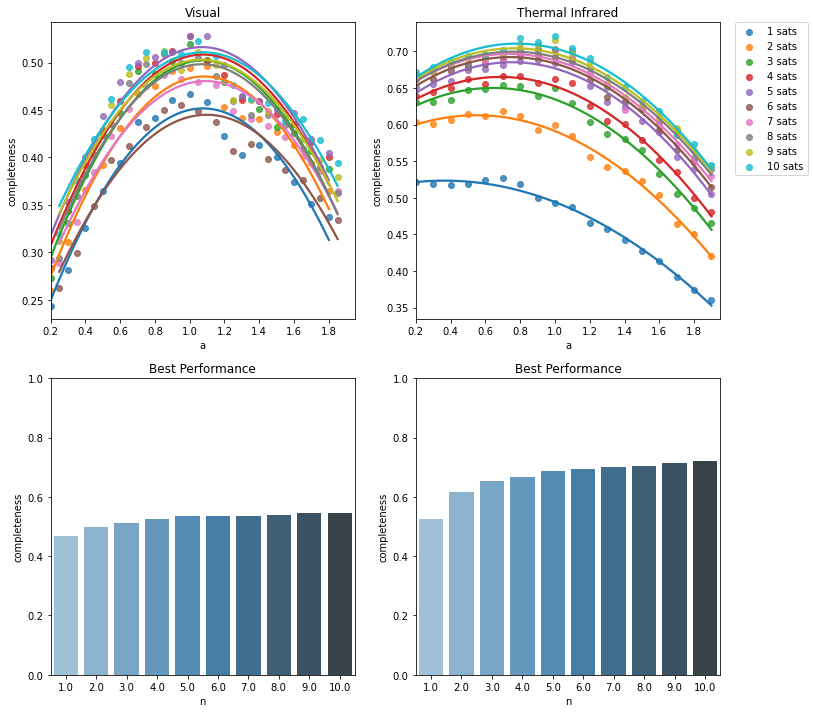

In [3]:
# Number of Satellites
fig_n, axes_n = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_n[i][j].set_xlim((0.2, 1.95))
        
axes_n[0][0].set_title('Visual')
axes_n[0][1].set_title('Thermal Infrared')
axes_n[1][0].set_title('Best Performance')
axes_n[1][1].set_title('Best Performance')

for i in range(1, int(max(df_tir_n['n']))+1):
    sns.regplot(data=df_vis_a.loc[df_tir_n['n'] == i], x='a', y='completeness', ax=axes_n[0][0], order=2, label=f"{i} sats", ci=0)
    sns.regplot(data=df_tir_n.loc[df_tir_n['n'] == i], x='a', y='completeness', ax=axes_n[0][1], order=2, label=f"{i} sats", ci=0)
axes_n[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

sns.barplot(data=df_vis_n.groupby('n').max().reset_index(), x='n', y='completeness', ax=axes_n[1][0], palette="Blues_d")
sns.barplot(data=df_tir_n.groupby('n').max().reset_index(), x='n', y='completeness', ax=axes_n[1][1], palette="Blues_d")
axes_n[1][0].set_ylim((0.0, 1.0))
axes_n[1][1].set_ylim((0.0, 1.0))

plt.show()

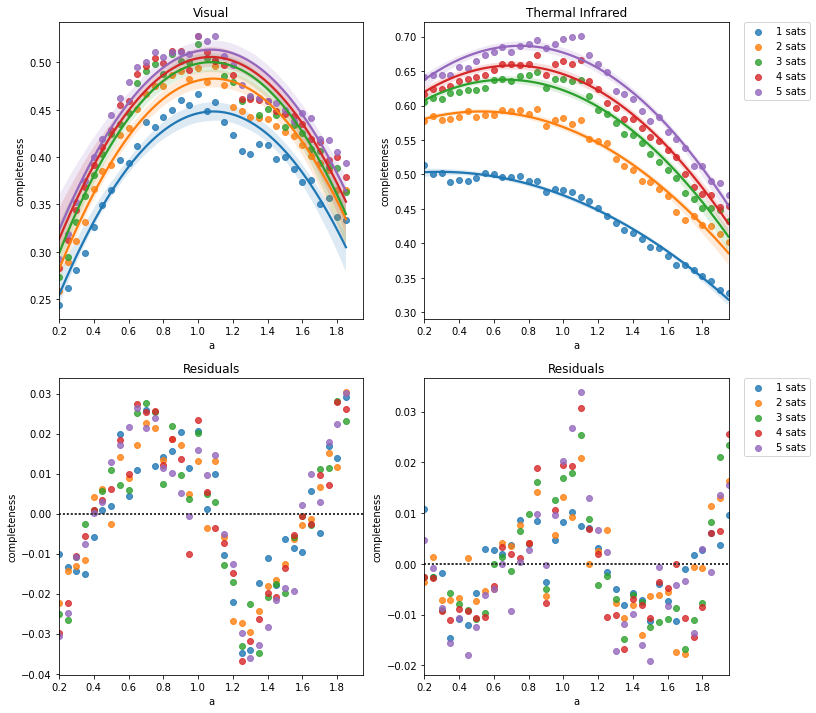

In [4]:
# Semi-major axis
fig_a, axes_a = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_a[i][j].set_xlim((0.2, 1.95))
        
axes_a[0][0].set_title('Visual')
axes_a[0][1].set_title('Thermal Infrared')
axes_a[1][0].set_title('Residuals')
axes_a[1][1].set_title('Residuals')

for i in range(1, int(max(df_tir_a['n']))+1):
    sns.regplot(data=df_vis_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[0][0], order=2)
    sns.regplot(data=df_tir_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[0][1], order=2, label=f"{i} sats")
    sns.residplot(data=df_vis_a.loc[df_vis_a['n'] == i], x='a', y='completeness', ax=axes_a[1][0], order=2)
    sns.residplot(data=df_tir_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[1][1], order=2, label=f"{i} sats")
axes_a[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_a[1][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [5]:
df_a_fit = pd.DataFrame(columns = ['n', 'a', 'completeness', 'payload'])
for i in range(1, int(max(df_vis_a['n']))+1):
    a_fit = np.polyfit(df_vis_a.loc[df_tir_a['n'] == i]['a'], df_vis_a.loc[df_tir_a['n'] == i]['completeness'], 2)
    a_max = -1*a_fit[1] / (2*a_fit[0])
    c_max = a_fit[0] * a_max**2 + a_fit[1] * a_max + a_fit[2]
    result = {'n': i,
             'a': a_max,
             'completeness': c_max,
             'payload': 'VIS'}
    df_a_fit = df_a_fit.append(result, ignore_index=True)
for i in range(1, int(max(df_tir_a['n']))+1):
    a_fit = np.polyfit(df_tir_a[df_tir_a['n'] == i]['a'], df_tir_a[df_tir_a['n'] == i]['completeness'], 2)
    a_max = -1*a_fit[1] / (2*a_fit[0])
    c_max = a_fit[0] * a_max**2 + a_fit[1] * a_max + a_fit[2]
    result = {'n': i,
             'a': a_max,
             'completeness': c_max,
             'payload': 'TIR'}
    df_a_fit = df_a_fit.append(result, ignore_index=True)
df_a_fit

,n,a,completeness,payload
0,1,1.087494,0.448228,VIS
1,2,1.088185,0.482923,VIS
2,3,1.072803,0.500311,VIS
3,4,1.072939,0.505821,VIS
4,5,1.075083,0.513540,VIS
5,1,0.288462,0.503753,TIR
6,2,0.527691,0.591416,TIR
7,3,0.665897,0.637586,TIR
8,4,0.708571,0.658157,TIR
9,5,0.752100,0.686695,TIR


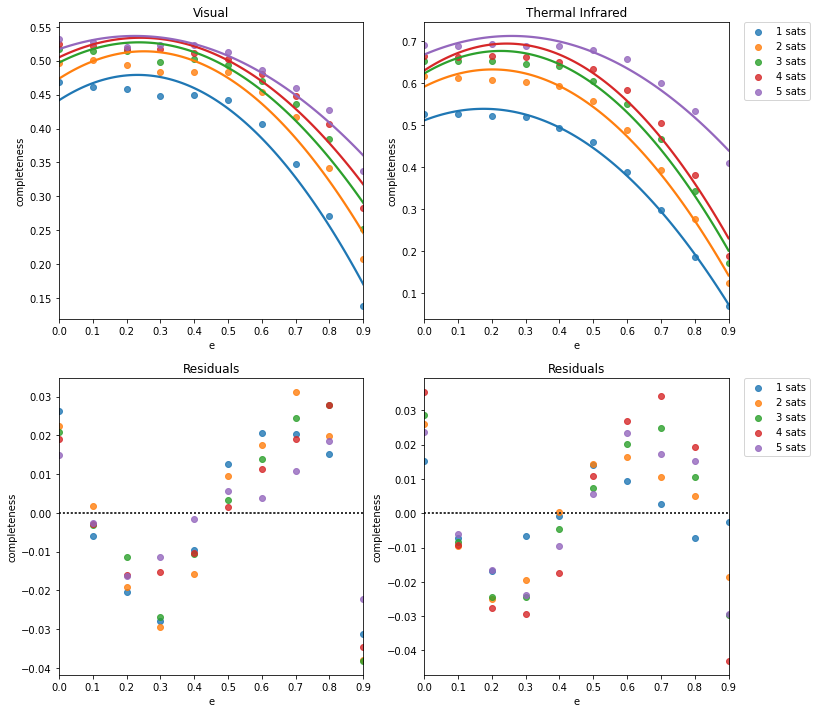

In [9]:
# Eccentricity
fig_e, axes_e = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_e[i][j].set_xlim((0.0, 0.9))
        
axes_e[0][0].set_title('Visual')
axes_e[0][1].set_title('Thermal Infrared')
axes_e[1][0].set_title('Residuals')
axes_e[1][1].set_title('Residuals')

df_vis_e_grouped = df_vis_e.groupby(['n', 'e'])['completeness'].max().reset_index()
df_tir_e_grouped = df_tir_e.groupby(['n', 'e'])['completeness'].max().reset_index()

df_vis_e_grouped = df_vis_e_grouped[df_vis_e_grouped['n'] < 6]
df_tir_e_grouped = df_tir_e_grouped[df_tir_e_grouped['n'] < 6]

for i in range(1, int(max(df_tir_e_grouped['n']))+1):
    sns.regplot(data=df_vis_e_grouped[df_tir_e_grouped['n'] == i], x='e', y='completeness', ax=axes_e[0][0], label=f"{i} sats", order=2, ci=0)
    sns.regplot(data=df_tir_e_grouped[df_tir_e_grouped['n'] == i], x='e', y='completeness', ax=axes_e[0][1], label=f"{i} sats", order=2, ci=0)
    sns.residplot(data=df_vis_e_grouped[df_vis_e_grouped['n'] == i], x='e', y='completeness', ax=axes_e[1][0], label=f"{i} sats", order=2)
    sns.residplot(data=df_tir_e_grouped[df_tir_e_grouped['n'] == i], x='e', y='completeness', ax=axes_e[1][1], label=f"{i} sats", order=2)
axes_e[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_e[1][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

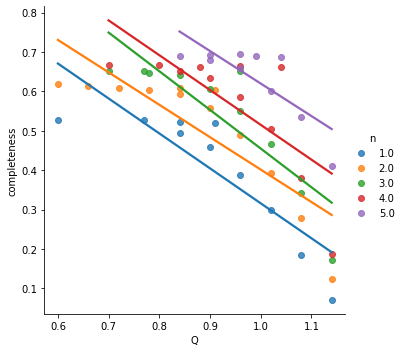

In [17]:
df_tir_e_grouped = df_tir_e.groupby(['n', 'e'])['completeness'].max().reset_index()
df_merged_e = df_tir_e_grouped.merge(df_tir_e, how='left', on=['n', 'e', 'completeness'])
df_merged_e['q'] = df_merged_e['a']*(1-df_merged_e['e'])
df_merged_e['Q'] = df_merged_e['a']*(1+df_merged_e['e'])
#df_merged_e.loc[df_merged_e['n'] == 5]
sns.lmplot(data=df_merged_e, x='Q', y='completeness', hue='n', ci=0)

In [14]:
df_vis_e_grouped = df_vis_e.groupby(['n', 'e'])['completeness'].max().reset_index()
df_merged_e = df_vis_e_grouped.merge(df_vis_e, how='left', on=['n', 'e', 'completeness'])
df_merged_e['q'] = df_merged_e['a']*(1-df_merged_e['e'])
df_merged_e['Q'] = df_merged_e['a']*(1+df_merged_e['e'])
df_merged_e.loc[df_merged_e['n'] == 5]

,n,e,completeness,Unnamed: 0,a,spread,q,Q
40,5.0,0.0,0.532,204,1.0,0.2,1.00,1.00
41,5.0,0.1,0.528,209,1.0,0.2,0.90,1.10
42,5.0,0.2,0.520,164,0.9,0.2,0.72,1.08
43,5.0,0.3,0.523,69,0.7,0.2,0.49,0.91
44,5.0,0.4,0.523,24,0.6,0.2,0.36,0.84
45,5.0,0.5,0.513,79,0.7,0.2,0.35,1.05
46,5.0,0.6,0.486,34,0.6,0.2,0.24,0.96
47,5.0,0.7,0.460,39,0.6,0.2,0.18,1.02
48,5.0,0.8,0.427,44,0.6,0.2,0.12,1.08
49,5.0,0.9,0.338,49,0.6,0.2,0.06,1.14


In [8]:
'''
CURRENTLY BROKEN -> SOLUTION INCORRECT
df_e_fit = pd.DataFrame(columns = ['n', 'e', 'completeness', 'payload'])
if False:
    for i in range(1, int(max(df_vis_e_grouped['e']))+1):
        e_fit = np.polyfit(df_vis_e_grouped[df_tir_e_grouped['n'] == i]['a'], df_vis_e_grouped[df_tir_e_grouped['n'] == i]['completeness'], 2)
        e_max = -1*e_fit[1] / (2*e_fit[0])
        c_max = a_fit[0] * e_max**2 + e_fit[1] * e_max + e_fit[2]
        result = {'n': i,
                 'e': a_max,
                 'completeness': c_max,
                 'payload': 'VIS'}
        df_e_fit = df_e_fit.append(result, ignore_index=True)
for i in range(1, int(max(df_tir_e_grouped['n']))+1):
    e_fit = np.polyfit(df_tir_e_grouped[df_tir_e_grouped['n'] == i]['a'], df_tir_e_grouped[df_tir_e_grouped['n'] == i]['completeness'], 2)
    e_max = -1*e_fit[1] / (2*e_fit[0])
    c_max = e_fit[0] * e_max**2 + e_fit[1] * e_max + e_fit[2]
    result = {'n': i,
             'e': e_max,
             'completeness': c_max,
             'payload': 'TIR'}
    df_e_fit = df_e_fit.append(result, ignore_index=True)
df_e_fit
'''

"\nCURRENTLY BROKEN -> SOLUTION INCORRECT\ndf_e_fit = pd.DataFrame(columns = ['n', 'e', 'completeness', 'payload'])\nif False:\n    for i in range(1, int(max(df_vis_e_grouped['e']))+1):\n        e_fit = np.polyfit(df_vis_e_grouped[df_tir_e_grouped['n'] == i]['a'], df_vis_e_grouped[df_tir_e_grouped['n'] == i]['completeness'], 2)\n        e_max = -1*e_fit[1] / (2*e_fit[0])\n        c_max = a_fit[0] * e_max**2 + e_fit[1] * e_max + e_fit[2]\n        result = {'n': i,\n                 'e': a_max,\n                 'completeness': c_max,\n                 'payload': 'VIS'}\n        df_e_fit = df_e_fit.append(result, ignore_index=True)\nfor i in range(1, int(max(df_tir_e_grouped['n']))+1):\n    e_fit = np.polyfit(df_tir_e_grouped[df_tir_e_grouped['n'] == i]['a'], df_tir_e_grouped[df_tir_e_grouped['n'] == i]['completeness'], 2)\n    e_max = -1*e_fit[1] / (2*e_fit[0])\n    c_max = e_fit[0] * e_max**2 + e_fit[1] * e_max + e_fit[2]\n    result = {'n': i,\n             'e': e_max,\n             '

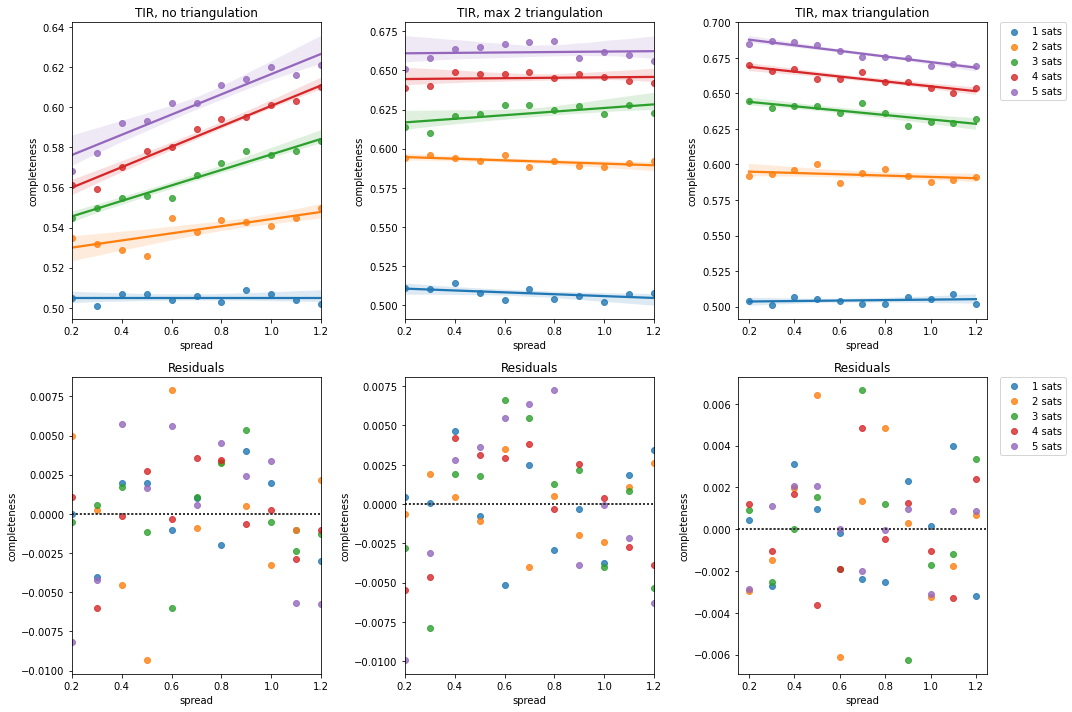

In [27]:
# Inter-satellite spread
fig_s, axes_s = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    for j in range(2):
        axes_s[i][j].set_xlim((0.2, 1.2))
        
axes_s[0][0].set_title('TIR, no triangulation')
axes_s[0][1].set_title('TIR, max 2 triangulation')
axes_s[0][2].set_title('TIR, max triangulation')
axes_s[1][0].set_title('Residuals')
axes_s[1][1].set_title('Residuals')
axes_s[1][2].set_title('Residuals')

df_tir_si_grouped = df_tir_s_si.groupby(['n', 'spread']).max('completeness').reset_index()
df_tir_db_grouped = df_tir_s_db.groupby(['n', 'spread']).max('completeness').reset_index()
df_tir_mx_grouped = df_tir_s_mx.groupby(['n', 'spread']).max('completeness').reset_index()

df_tir_si_grouped = df_tir_si_grouped[df_tir_si_grouped['n'] < 6]
df_tir_db_grouped = df_tir_db_grouped[df_tir_db_grouped['n'] < 6]
df_tir_mx_grouped = df_tir_mx_grouped[df_tir_mx_grouped['n'] < 6]

for i in range(1, int(max(df_tir_si_grouped['n']))+1):
    sns.regplot(data=df_tir_si_grouped.loc[df_tir_si_grouped['n'] == i], x='spread', y='completeness', ax=axes_s[0][0], order=1, label=f"{i} sats")
    sns.residplot(data=df_tir_si_grouped.loc[df_tir_si_grouped['n'] == i], x='spread', y='completeness', ax=axes_s[1][0], order=1, label=f"{i} sats")
    sns.regplot(data=df_tir_db_grouped.loc[df_tir_db_grouped['n'] == i], x='spread', y='completeness', ax=axes_s[0][1], order=1, label=f"{i} sats")
    sns.residplot(data=df_tir_db_grouped.loc[df_tir_db_grouped['n'] == i], x='spread', y='completeness', ax=axes_s[1][1], order=1, label=f"{i} sats")
    sns.regplot(data=df_tir_mx_grouped.loc[df_tir_mx_grouped['n'] == i], x='spread', y='completeness', ax=axes_s[0][2], order=1, label=f"{i} sats")
    sns.residplot(data=df_tir_mx_grouped.loc[df_tir_mx_grouped['n'] == i], x='spread', y='completeness', ax=axes_s[1][2], order=1, label=f"{i} sats")
axes_s[0][2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_s[1][2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

## Validation

Also some discussion on sensitivity - how to tackle

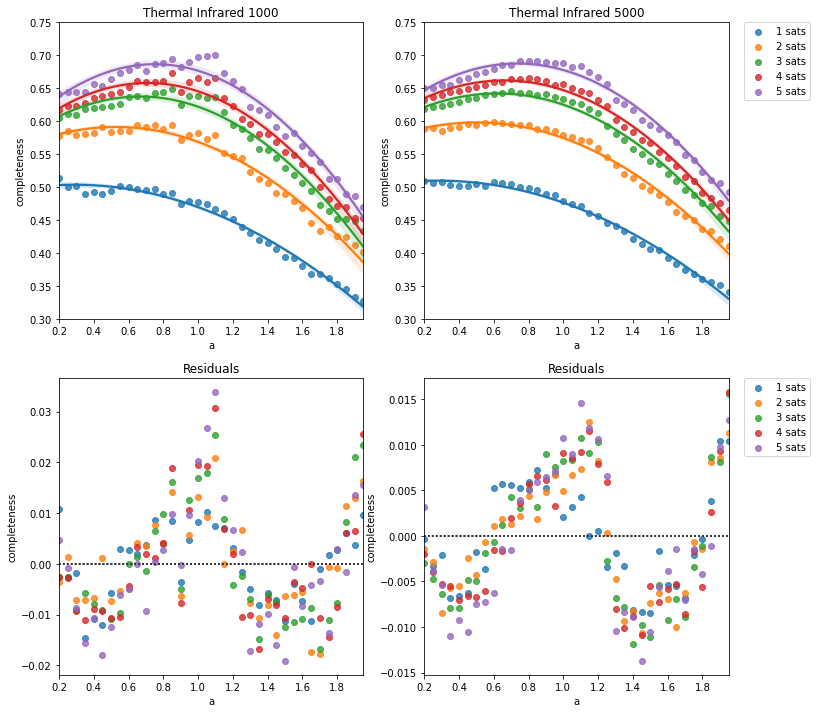

In [10]:
# Validation, number of asteroids
fig_a, axes_a = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_a[i][j].set_xlim((0.2, 1.95))
        axes_a[0][j].set_ylim((0.3, 0.75))
        
axes_a[0][0].set_title('Thermal Infrared 1000')
axes_a[0][1].set_title('Thermal Infrared 5000')
axes_a[1][0].set_title('Residuals')
axes_a[1][1].set_title('Residuals')

for i in range(1, int(max(df_tir_a['n']))+1):
    sns.regplot(data=df_tir_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[0][0], order=2)
    sns.regplot(data=df_tir_f.loc[df_tir_f['n'] == i], x='a', y='completeness', ax=axes_a[0][1], order=2, label=f"{i} sats")
    sns.residplot(data=df_tir_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[1][0], order=2)
    sns.residplot(data=df_tir_f.loc[df_tir_f['n'] == i], x='a', y='completeness', ax=axes_a[1][1], order=2, label=f"{i} sats")
axes_a[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_a[1][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

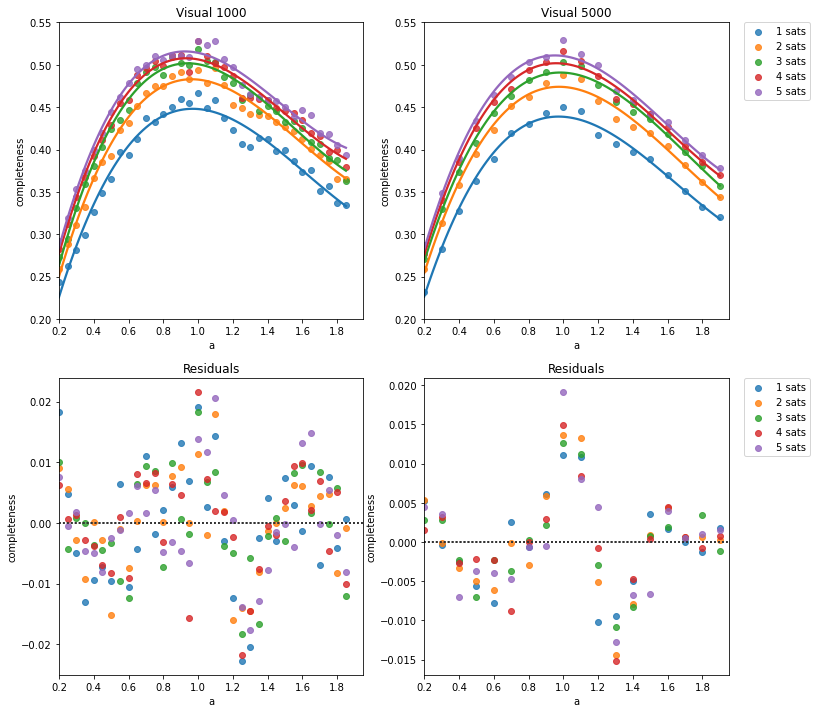

In [29]:
# Validation, number of asteroids
fig_a, axes_a = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_a[i][j].set_xlim((0.2, 1.95))
        axes_a[0][j].set_ylim((0.2, 0.55))
        
axes_a[0][0].set_title('Visual 1000')
axes_a[0][1].set_title('Visual 5000')
axes_a[1][0].set_title('Residuals')
axes_a[1][1].set_title('Residuals')

for i in range(1, int(max(df_vis_f['n']))+1):
    sns.regplot(data=df_vis_a.loc[df_vis_a['n'] == i], x='a', y='completeness', ax=axes_a[0][0], order=3,ci=0)
    sns.regplot(data=df_vis_f.loc[df_vis_f['n'] == i], x='a', y='completeness', ax=axes_a[0][1], order=3, label=f"{i} sats",ci=0)
    sns.residplot(data=df_vis_a.loc[df_vis_a['n'] == i], x='a', y='completeness', ax=axes_a[1][0], order=3)
    sns.residplot(data=df_vis_f.loc[df_vis_f['n'] == i], x='a', y='completeness', ax=axes_a[1][1], order=3, label=f"{i} sats")
axes_a[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_a[1][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

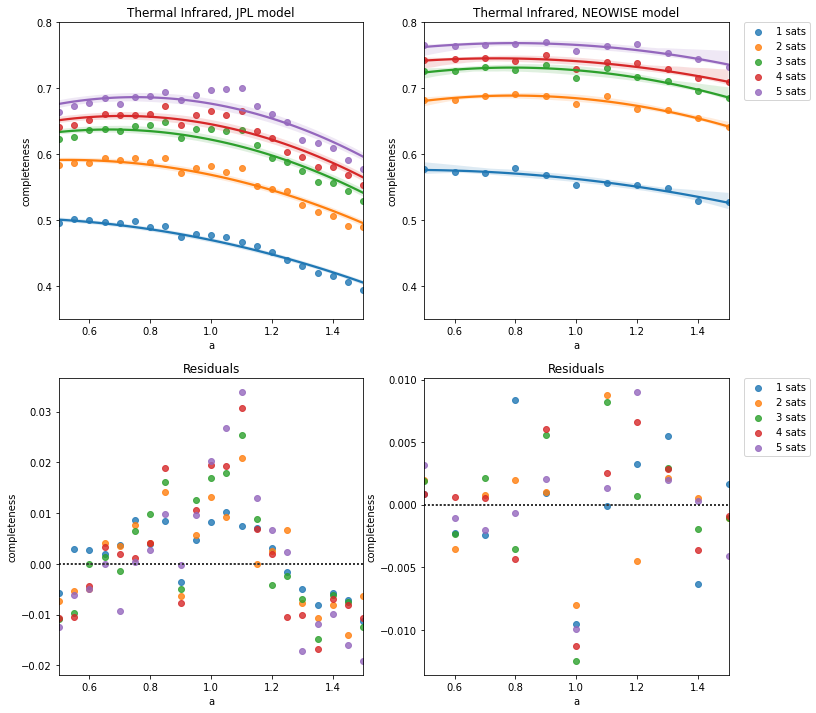

In [11]:
# Validation, model
fig_a, axes_a = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_a[i][j].set_xlim((0.5, 1.5))
        axes_a[0][j].set_ylim((0.35, 0.8))
        
axes_a[0][0].set_title('Thermal Infrared, JPL model')
axes_a[0][1].set_title('Thermal Infrared, NEOWISE model')
axes_a[1][0].set_title('Residuals')
axes_a[1][1].set_title('Residuals')

for i in range(1, int(max(df_tir_a['n']))+1):
    sns.regplot(data=df_tir_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[0][0], order=2)
    sns.regplot(data=df_tir_p.loc[df_tir_p['n'] == i], x='a', y='completeness', ax=axes_a[0][1], order=2, label=f"{i} sats")
    sns.residplot(data=df_tir_a.loc[df_tir_a['n'] == i], x='a', y='completeness', ax=axes_a[1][0], order=2)
    sns.residplot(data=df_tir_p.loc[df_tir_p['n'] == i], x='a', y='completeness', ax=axes_a[1][1], order=2, label=f"{i} sats")
axes_a[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_a[1][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

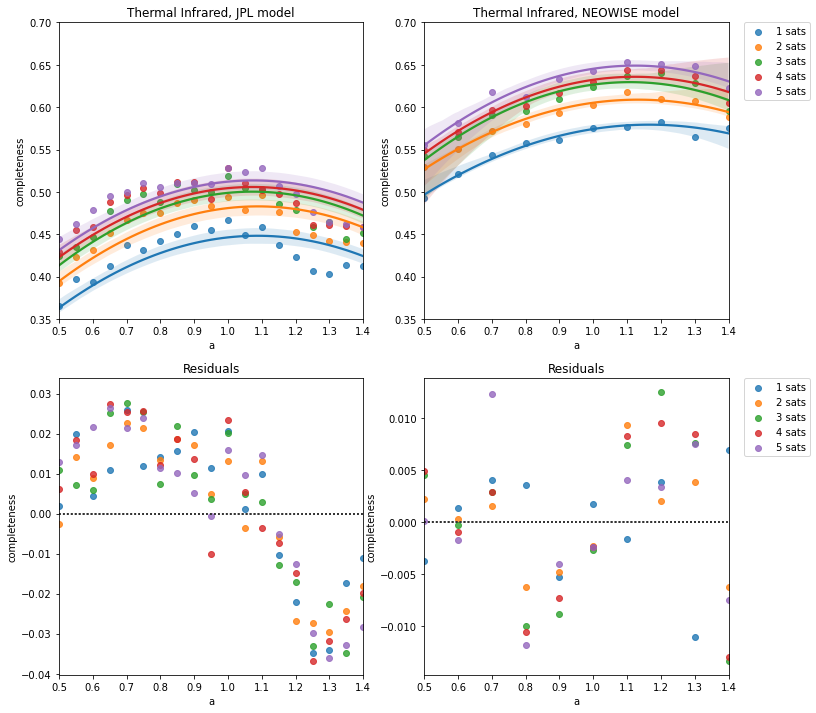

In [12]:
# Validation, model
fig_a, axes_a = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        axes_a[i][j].set_xlim((0.5, 1.4))
        axes_a[0][j].set_ylim((0.35, 0.7))
        
axes_a[0][0].set_title('Thermal Infrared, JPL model')
axes_a[0][1].set_title('Thermal Infrared, NEOWISE model')
axes_a[1][0].set_title('Residuals')
axes_a[1][1].set_title('Residuals')

for i in range(1, int(max(df_tir_a['n']))+1):
    sns.regplot(data=df_vis_a.loc[df_vis_a['n'] == i], x='a', y='completeness', ax=axes_a[0][0], order=2)
    sns.regplot(data=df_vis_p.loc[df_vis_p['n'] == i], x='a', y='completeness', ax=axes_a[0][1], order=2, label=f"{i} sats")
    sns.residplot(data=df_vis_a.loc[df_vis_a['n'] == i], x='a', y='completeness', ax=axes_a[1][0], order=2)
    sns.residplot(data=df_vis_p.loc[df_vis_p['n'] == i], x='a', y='completeness', ax=axes_a[1][1], order=2, label=f"{i} sats")
axes_a[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_a[1][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes_a
plt.show()